# Sales Analysis

- Ref:19-1001

### Import Necessary Libraries

In [77]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

#### Task # 1: Merge the 12 months of sales data into a single CSV file

In [2]:
# df = pd.read_csv("./Sales_Data/Sales_April_2019.csv") # sible file read (./ means go inside other folder)

# Step 1 : read the file
files = [file for file in os.listdir('./Sales_Data/')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
# Step 2: Concate all files into a single csv file
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
# all_months_data.head()
# all_months_data.to_csv("all_data.csv", index=False) # update data file, Uncomment when needed

#### Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Up the data

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)] # NaN is available in all 6 cols
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


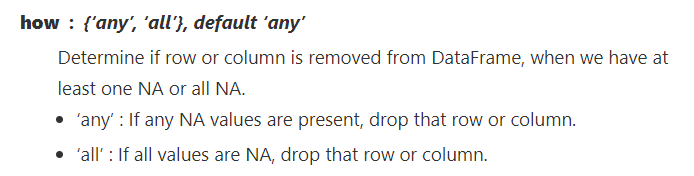

#### Get rid of text (e.g Or) in Order Date Column

In [6]:
# temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']  # Remove those rows where header duplicated
# temp_df.head() # output was as follows

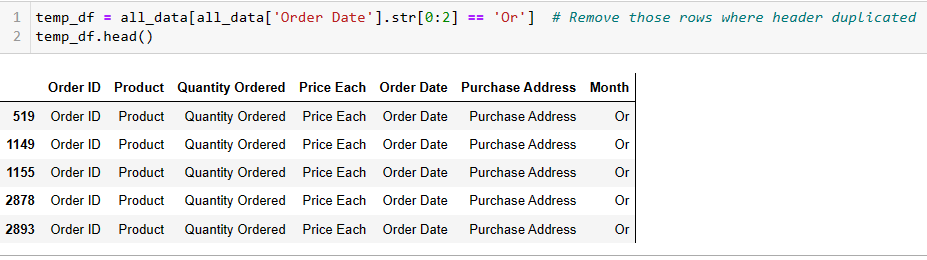

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']  # original data frame where str !='Or'

#### Convert Columns to correct type

In [8]:
# Type Correction for qty order, preprocessed for calculing sales Revenue
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Make int
all_data ['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

### Augment data with additional columns

### Task 2: Add Month Column

- Split first two str from Order Date
- Month must a numerical value, so need to convert; but if there are any NaN that must be process first before num conversion

In [9]:
all_data['Month'] = all_data['Order Date'].str[0:2] # extract first two from "Order Date"
all_data['Month'] = all_data['Month'].astype('int32')  # Data str converted into int
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [10]:
# Add Month col - altenative method

# all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
# all_data.head()

- all_data['Month'] = all_data['Month'].astype('int32') >> return below val error, because there are some "Or..." in Order date, which need to fixed
- ValueError: invalid literal for int() with base 10: 'Or' 

### Task 3: Add a Sales Column

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data ['Price Each']  # Sales Qty X Price
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 4: Add a City Column

In [12]:
# Let's use .apply()
# We want to extrat 2 value or 1 index of address col e.g "Dallas" in between commas

def get_city(address): 
    return address.split(',')[1]  # 1: 2nd val after split

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')') 
all_data.head()

# Note:
# all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# Lambda x: considered "Purchase Addr" as x & apply by split param, where x is cell context e.g pur address
# index 1: that mean 2nd val e.g Dallas
# City name can be uplicate so, we can add street along with city by e.g defing a fun "get_state"

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Task 5: Convert Order date to datetime format

# Data Exploration

#### Question 1: What was the best month for sales ? How much was earned that month ?

In [13]:
result = all_data.groupby('Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


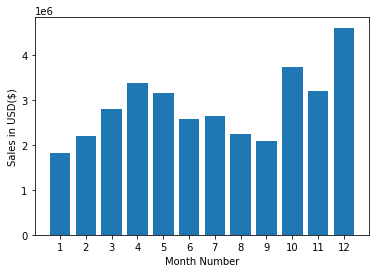

In [14]:
months = range(1, 13) # 12 months

plt.bar(months, result['Sales'])
plt.xticks(months) # show all months
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

# Observation:
# Got height sales in Dec

#### Question 2: Which City sold most / what City had the highest number of sales  ?

In [15]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


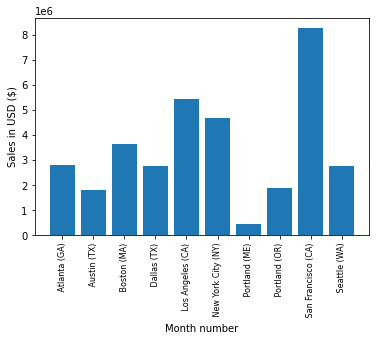

In [16]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show() 

In [17]:
# Alternative- there will be some problem because of ordering issue
# cities = all_data['City'].unique()

# plt.bar(cities, result['Sales'])
# plt.xticks(cities)
# plt.ylabel('Sales in USD($)')
# plt.xlabel('City Name')
# plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

- first need to convert "Order Date" to datetime format
- then extract hour, minues, second simultenously

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) # Datetime Conversion
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [19]:
# Add Necessary Columns
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1  # we will find max selling hour by counting no of observation/frequecy (hour); not by "summation"

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


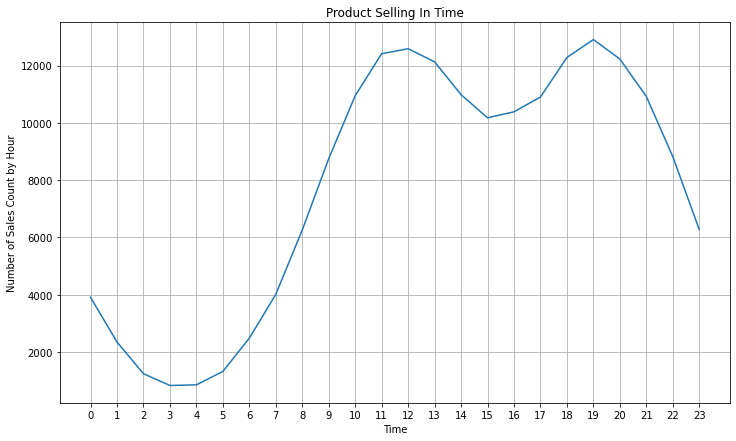

In [20]:
keys = [pair for pair, df in all_data.groupby('Hour')]

plt.figure(figsize=(12,7))
plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.title('Product Selling In Time')
plt.xlabel('Time')
plt.ylabel('Number of Sales Count by Hour')
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

In [21]:
all_data.groupby(['Hour']).count().head() # Number of Row/sales count by hours (24 hours)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854


#### Question 4: What products are most often sold together?

In [22]:
all_data.head()

# Understanding:
# Same order ID/ invoice number tell us, the collection of products sold together e.g Google Phone, Wired Headphone etc.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [23]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]  # keep=False: return all duplicates

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1


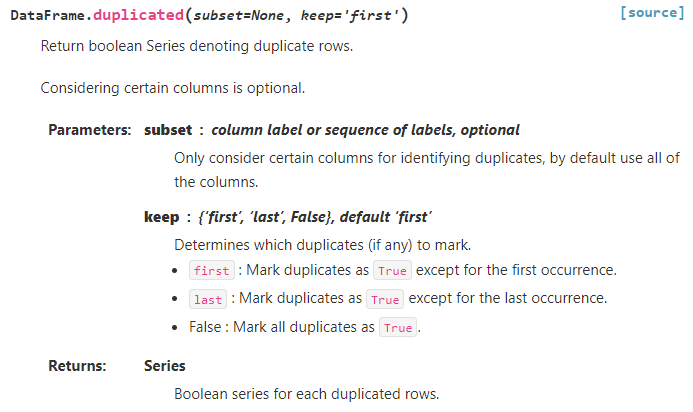

In [78]:
## working for what products are most often sold together

df = all_data[all_data['Order ID'].duplicated(keep=False)]  # keep=False: return all duplicates
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # paring same selling goods by 'Order ID'
df = df[['Order ID','Grouped']].drop_duplicates() # remove duplicates in order ID & grouped,
df.head(100)

# After removing duplicates need to count the pair(grouped)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [25]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:     # sublist
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))  # Most common 2 items sold together
    
print(count)

# Observation:
# its pitty messy, can make it more clear by "print.most_common(10)"



Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [33]:
# addional test1
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3))) # most common 3 items sold together
count.most_common(10)      # count is object while .most_common is a method; more readable


[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

In [34]:
# addional test2
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [28]:
# Exercise:

from itertools import combinations
from collections import Counter

list1 = [[2, 3], [2, 3, 4]]  # list of list

count = Counter()

for sublist in list1:
    count.update(Counter(combinations(sublist, 2)))
    
print(count)





Counter({(2, 3): 2, (2, 4): 1, (3, 4): 1})


#### Question 5: What product sold the most ? Why do you think it sold the most ?

In [35]:
all_data.head()
# we need to sum of "Quantity Ordered" by grouping "product"

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [38]:
# Group by Product
product_group = all_data.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,13325
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800


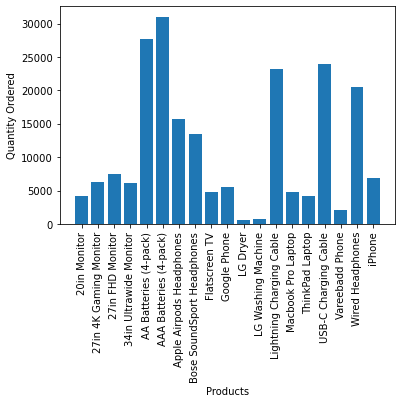

In [47]:
# Group by Product
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']    # y variable e.g ordered quantity


products = [product for product, df in product_group]         # x variable e.g products

#plot
plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size=10)
plt.show()


# Answer to Question for 5:
# most selling products are AA & AAA batteries
# Due to higher price, lower sales for LG Dryer & LG Washing Machine 


In [52]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

# Since price of items can be changed over time, so it tried to get the average mean for having an idea

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


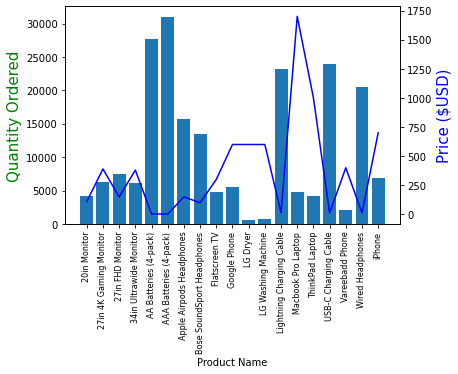

<Figure size 720x432 with 0 Axes>

In [80]:
# Adding Second y axis

prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

plt.figure(figsize=(10,6))
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)  # x: products, y: quantity_ordered (left axis); 1st y label is Quantity
ax2.plot(products, prices, 'b-')   # 'b-': line color style   (right axis); 2nd Y label is Price

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g', fontsize=15)
ax2.set_ylabel('Price ($USD)', color = 'b', fontsize=15)  # Blue is price line

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

# Observation:
# Prices are high, sales quantity falls

## Reference

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
- https://www.geeksforgeeks.org/python-itertools-combinations-function/
- https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/
- https://docs.python.org/3/library/warnings.html